<a href="https://colab.research.google.com/github/jai2shan/TSAI-EVA40-Assignments/blob/master/Session%208/Assignment_8_Trial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install asgnmt8-0.0.0-py3-none-any.whl


## Including L2 Regularization

In [0]:
from torchvision import transforms
from asgnmt8.DataLoader import cifar_data_loader,View_images
transform_params = transforms.Compose([transforms.RandomHorizontalFlip(),
                                       transforms.Grayscale(num_output_channels=3), 
                                       transforms.RandomCrop(32, padding=4),  
                                       transforms.RandomRotation(10),  
                                       transforms.RandomAffine(0,shear=10,scale=(0.8,1.2)),  
                                       transforms.ColorJitter(brightness=0.2,contrast=0.2,saturation=0.2),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

trainloader,testloader = cifar_data_loader(transform_params,BatchSize=250)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
import torch

from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

from asgnmt8.resnet import ResNet18
net = ResNet18().to(device)
summary(net, input_size=(3,32,32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
from asgnmt8.Training_Testing import TrainTest
import torch.optim as optim
import torch.nn as nn

tt = TrainTest()
test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9,weight_decay = 0.00005)
#scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

for epoch in range(30):
    print("EPOCH:", epoch)
    tt.train_(net, device, trainloader, optimizer, criterion, epoch,L1 = False)
#    scheduler.step()
    acc = tt.test_(net, device, testloader)  
    
   
print('Finished Training')

  0%|          | 0/200 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.473933458328247 Batch_id=199 Accuracy=33.17: 100%|██████████| 200/200 [04:11<00:00,  1.26s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -2.0218, Accuracy: 4241/10000 (42.41%)

EPOCH: 1


Loss=1.277287483215332 Batch_id=199 Accuracy=48.69: 100%|██████████| 200/200 [04:11<00:00,  1.26s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -2.3462, Accuracy: 5127/10000 (51.27%)

EPOCH: 2


Loss=1.1370375156402588 Batch_id=199 Accuracy=56.04: 100%|██████████| 200/200 [04:10<00:00,  1.25s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -2.8322, Accuracy: 5618/10000 (56.18%)

EPOCH: 3


Loss=1.0192878246307373 Batch_id=199 Accuracy=61.49: 100%|██████████| 200/200 [04:10<00:00,  1.25s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -3.4303, Accuracy: 6032/10000 (60.32%)

EPOCH: 4


Loss=0.9586319327354431 Batch_id=199 Accuracy=64.64: 100%|██████████| 200/200 [04:10<00:00,  1.25s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -3.7751, Accuracy: 6359/10000 (63.59%)

EPOCH: 5


Loss=0.8735823035240173 Batch_id=199 Accuracy=67.55: 100%|██████████| 200/200 [04:10<00:00,  1.25s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -4.0273, Accuracy: 6753/10000 (67.53%)

EPOCH: 6


Loss=0.7957044839859009 Batch_id=199 Accuracy=70.12: 100%|██████████| 200/200 [04:10<00:00,  1.25s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -4.2668, Accuracy: 6823/10000 (68.23%)

EPOCH: 7


Loss=0.8162779808044434 Batch_id=199 Accuracy=72.04: 100%|██████████| 200/200 [04:11<00:00,  1.26s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -4.6112, Accuracy: 7016/10000 (70.16%)

EPOCH: 8


Loss=0.7250089049339294 Batch_id=199 Accuracy=73.59: 100%|██████████| 200/200 [04:10<00:00,  1.25s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -4.9380, Accuracy: 7182/10000 (71.82%)

EPOCH: 9


Loss=0.7379987239837646 Batch_id=199 Accuracy=75.42: 100%|██████████| 200/200 [04:10<00:00,  1.25s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.0793, Accuracy: 7204/10000 (72.04%)

EPOCH: 10


Loss=0.6919946074485779 Batch_id=199 Accuracy=76.53: 100%|██████████| 200/200 [04:11<00:00,  1.26s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.2665, Accuracy: 7253/10000 (72.53%)

EPOCH: 11


Loss=0.5926454067230225 Batch_id=199 Accuracy=77.49: 100%|██████████| 200/200 [04:11<00:00,  1.26s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.1245, Accuracy: 7382/10000 (73.82%)

EPOCH: 12


Loss=0.6042984127998352 Batch_id=199 Accuracy=78.57: 100%|██████████| 200/200 [04:11<00:00,  1.26s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.4395, Accuracy: 7438/10000 (74.38%)

EPOCH: 13


Loss=0.588464617729187 Batch_id=199 Accuracy=79.55: 100%|██████████| 200/200 [04:11<00:00,  1.26s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.4717, Accuracy: 7580/10000 (75.80%)

EPOCH: 14


Loss=0.5010191798210144 Batch_id=199 Accuracy=80.26: 100%|██████████| 200/200 [04:11<00:00,  1.26s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.8481, Accuracy: 7672/10000 (76.72%)

EPOCH: 15


Loss=0.5451347231864929 Batch_id=199 Accuracy=81.16: 100%|██████████| 200/200 [04:11<00:00,  1.26s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -5.8622, Accuracy: 7673/10000 (76.73%)

EPOCH: 16


Loss=0.5160107016563416 Batch_id=199 Accuracy=81.58: 100%|██████████| 200/200 [04:14<00:00,  1.27s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.1360, Accuracy: 7770/10000 (77.70%)

EPOCH: 17


Loss=0.40755969285964966 Batch_id=199 Accuracy=82.52: 100%|██████████| 200/200 [04:14<00:00,  1.27s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.1406, Accuracy: 7683/10000 (76.83%)

EPOCH: 18


Loss=0.4989478588104248 Batch_id=199 Accuracy=83.11: 100%|██████████| 200/200 [04:14<00:00,  1.27s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.6380, Accuracy: 7857/10000 (78.57%)

EPOCH: 19


Loss=0.48942065238952637 Batch_id=199 Accuracy=83.68: 100%|██████████| 200/200 [04:14<00:00,  1.27s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.5190, Accuracy: 7834/10000 (78.34%)

EPOCH: 20


Loss=0.5017991662025452 Batch_id=199 Accuracy=84.35: 100%|██████████| 200/200 [04:14<00:00,  1.27s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.6691, Accuracy: 7889/10000 (78.89%)

EPOCH: 21


Loss=0.593776524066925 Batch_id=199 Accuracy=84.86: 100%|██████████| 200/200 [04:14<00:00,  1.27s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.8448, Accuracy: 7944/10000 (79.44%)

EPOCH: 22


Loss=0.4038081765174866 Batch_id=199 Accuracy=85.53: 100%|██████████| 200/200 [04:14<00:00,  1.27s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -6.9158, Accuracy: 8010/10000 (80.10%)

EPOCH: 23


Loss=0.38262903690338135 Batch_id=199 Accuracy=85.87: 100%|██████████| 200/200 [04:14<00:00,  1.27s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -7.1113, Accuracy: 8022/10000 (80.22%)

EPOCH: 24


Loss=0.42422181367874146 Batch_id=199 Accuracy=86.25: 100%|██████████| 200/200 [04:14<00:00,  1.27s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -7.0013, Accuracy: 8027/10000 (80.27%)

EPOCH: 25


Loss=0.48555758595466614 Batch_id=199 Accuracy=86.77: 100%|██████████| 200/200 [04:14<00:00,  1.27s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -7.1899, Accuracy: 8071/10000 (80.71%)

EPOCH: 26


Loss=0.39498603343963623 Batch_id=199 Accuracy=86.91: 100%|██████████| 200/200 [04:14<00:00,  1.27s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -7.2363, Accuracy: 8091/10000 (80.91%)

EPOCH: 27


Loss=0.32510945200920105 Batch_id=199 Accuracy=87.59: 100%|██████████| 200/200 [04:13<00:00,  1.27s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -7.3371, Accuracy: 8070/10000 (80.70%)

EPOCH: 28


Loss=0.3908791244029999 Batch_id=199 Accuracy=87.99: 100%|██████████| 200/200 [04:14<00:00,  1.27s/it]
  0%|          | 0/200 [00:00<?, ?it/s]


Test set: Average loss: -7.3992, Accuracy: 8153/10000 (81.53%)

EPOCH: 29


Loss=0.39817726612091064 Batch_id=199 Accuracy=88.21: 100%|██████████| 200/200 [04:14<00:00,  1.27s/it]



Test set: Average loss: -7.5934, Accuracy: 8071/10000 (80.71%)

Finished Training


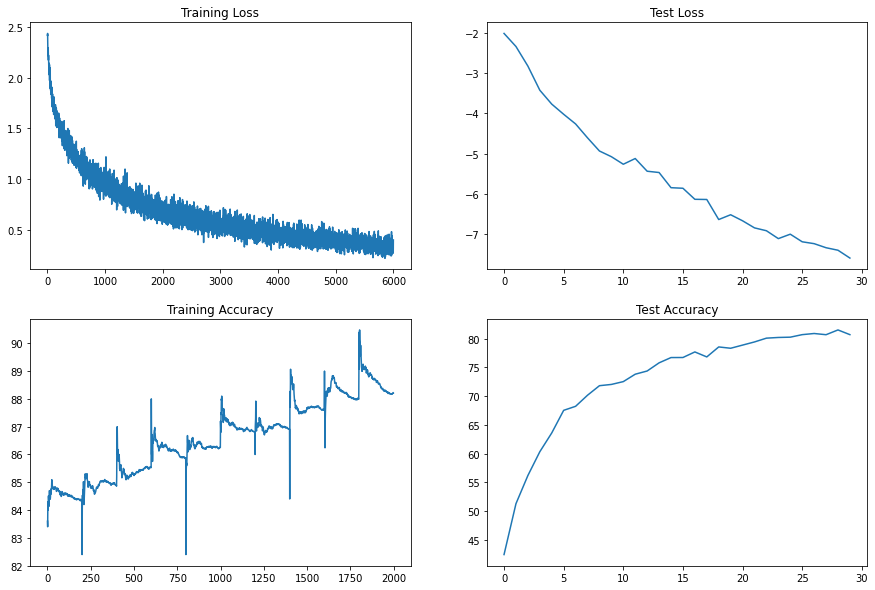

In [0]:
from asgnmt8.ModelPerformance import PlotTrainingGraphs,ViewModelPerformance

PlotTrainingGraphs(tt)

In [0]:
ViewModelPerformance(testloader,model,classes,device)

NameError: ignored